<a href="https://colab.research.google.com/github/GustavoHSilva07/Paradigmas_Programacao/blob/main/TAREFA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. PDF de print do seu notebook Python**

Faça uma Análise Exploratória dos Dados (EDA) com dados de seu interesse, empregando o Python e o que você aprendeu até aqui. Os sites apresentam diversos dados sobre as diferenças de desenvolvimento dos países e a desigualdade. Foque em perguntas que são do seu interesse sobre os dados.

Na sua análise você deve responder ao menos quatro perguntas relevantes sobre os dados, incluir na sua análise seleções e visualizações dos dados e um texto de conclusão a cada pergunta.    



## a) EDA - Conhecendo os dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

EV = pd.read_csv('/life_expectancy_years.csv')
display(EV.shape)
display(EV.head())
EV_t=EV.transpose()
EV_t=EV_t.rename(columns=EV_t.iloc[0]).drop(EV_t.index[0])
#display(EV_t.head())

(195, 302)

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.1,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.9,27.8,27.8,27.8,...,71.5,71.7,71.8,72.0,72.1,72.2,72.3,72.5,72.6,72.7,72.9,73.0,73.1,73.3,73.4,73.5,73.7,73.8,74.0,74.1,74.2,74.3,74.5,74.6,74.8,74.9,75.0,75.2,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,74.8,75.0,75.1,75.3,75.4,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8,76.9,77.0,77.2,77.3,77.4,77.5,77.7,77.8,77.9,78.0,78.2,78.3,78.4,78.6,78.7,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,84.3,84.4,84.5,84.6,84.7,84.8,84.9,85.0,85.2,85.3,85.4,85.5,85.6,85.7,85.8,85.9,86.0,86.1,86.2,86.3,86.4,86.5,86.6,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,79.3,79.4,79.5,79.7,79.8,79.9,80.0,80.1,80.2,80.3,80.4,80.5,80.7,80.8,80.9,81.0,81.0,81.2,81.3,81.3,81.4,81.5,81.6,81.7,81.8,81.9,82.0,82.1,82.2,82.3,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


b) Questões relevantes

I. Existem países sem dados de expectativa de vida? Qual a representatividade deles?

R: Sim, são um total de 9 países dentro dos 195 que represneta 4,62% do total.

In [ ]:
EV_t.isnull().sum() / len(EV_t)
Sem_dados=(EV_t.isnull().sum() > 0).sum()
print('Existem ',Sem_dados,' que não apresentam dados de expectativa de vida')
paises=EV.country.value_counts().sum()
porcent=Sem_dados/paises*100
print('Esses paises representam ','%0.2f'%porcent,'% dos dados mundiais')

Existem  9  que não apresentam dados de expectativa de vida
Esses paises representam  4.62 % dos dados mundiais


II. Qual a expectativa de vida no Brasil em 2021 e qual a sua posição em relação aos outros países?

R: No Brasil a expectativa de vida é de 76,4 anos e ele é só o 69º país nesse ranking.

In [ ]:
EV_2021 = pd.DataFrame(EV[['country','2021']].sort_values('2021',ascending=False) ).reset_index(drop=True)
EV_2021[EV_2021.country == 'Brazil']


,country,2021
69,Brazil,76.4


III. Qual Comportamento da expectativa de vida no Brasil nos últimos 30 anos?

R: Trata-se de um comportamento ascendente com uma inclinação próxima a 45º e uma queda leve entre os anos de 2019 e 2020. Nos últimos 30 anos houve uma evolução de quase 10 anos na expectativa de vida no Brasil.

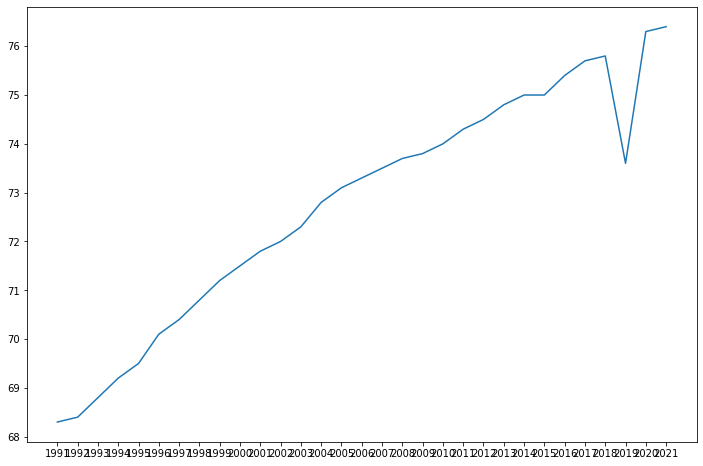

In [ ]:
EV_t.reset_index(level=0, inplace=True)
EV_t.rename(columns={'index':'Ano'},inplace=True)
EV_BR=pd.DataFrame(EV_t[['Ano','Brazil']]).reset_index(drop=True)
fim=2021-1799
inicio=fim-30
EV_BR=EV_BR.loc[inicio:fim]
#print(EV_BR)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(EV_BR.Ano,EV_BR.Brazil,label='Brasil')
plt.show()

IV. Há quantos anos o Brasil tem uma expectativa de vida superior a 70 anos? E qual a faixa etária com maior frequencia antes de 2021?

 R: Há aproximadamente 25 anos. A Faixa etária com maior frequencia no Brasil antes de 2021 é de 30 a 35 anos.

(array([ 24., 118.,   4.,   4.,   8.,  11.,   9.,  11.,  12.,  22.]),
 array([26.2, 31.22, 36.24, 41.260000000000005, 46.28, 51.3,
        56.32000000000001, 61.34, 66.36, 71.38000000000001, 76.4],
       dtype=object),
 <a list of 10 Patch objects>)

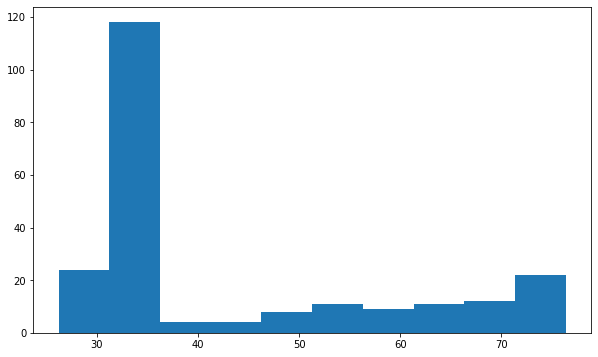

In [ ]:
EV_70=pd.DataFrame(EV_t[['Ano','Brazil']]).reset_index(drop=True)
fim=2021-1799
EV_70=EV_70.loc[0:fim]

plt.figure(figsize=(10,6))
plt.hist(EV_70.Brazil)



**2. Compartilhe o endereço do seu notebook Python (Google Drive ou GitHub) 100% executável para abertura no Google Colab.**

https://github.com/GustavoHSilva07/Paradigmas_Programacao

**3. Não deixe de incluir o seu texto uma introdução justificando a escolha da análise e ao final suas conclusões.**

**Intrudução**

Os dados foram obtidos do portal Gapminder e escolhi a expectativa de vida por se tratar de um indicador importante para os paises já que esta associado diretamente a qualidade de vida, educação e saniamento básico. Aplica-se no começo o conceito do EDA para identificar como era a estrutura dos dados e percebe-se que havia a posibilidade de transpor linhas e colunas para melhorar a manipulação. Nas questões busca-se utilizar os conceitos aprendidos nas 4 primeiras trilhas.

**Conclusão**

Tratou-se de ótima oportunidade para manipular uma base maior de dados e aplicar os conceitos aprendidos. Houve certa dificuldade na aplicação de fórmulas e a necessidade de buscar alguns comandos para manipular melhor os dados como por exemplo na transposição e reorganização do index.

Foi uma tarefa desafiadora e mostrou que certos conceitos principalmente na manipulação dos gráficos devem ser aprofundados.